In [3]:
!pip install prophet

  Stored in directory: /root/.cache/pip/wheels/77/3e/f3/1c536bf1f871f818686e7fbf31cab18d52787a72dea8640756
Successfully built prophet


In [0]:
import pandas as pd

In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/equester/TataTelecomAI/master/Sample%20Data/macdisconnection.csv")

In [0]:
data.columns = ['ds','y']

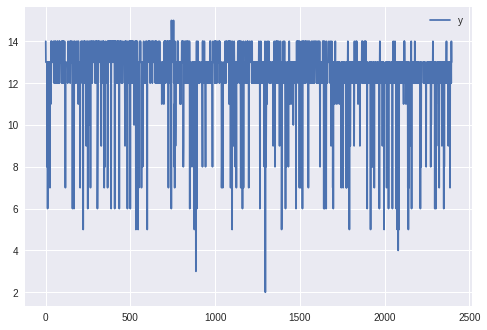

In [28]:
data.columns

Index(['ds', 'y'], dtype='object')

In [14]:
data.head()

,ds,y
0,01-03-2001 00:00,14
1,01-03-2001 00:15,13
2,01-03-2001 00:30,13
3,01-03-2001 00:45,13
4,01-03-2001 01:00,13


In [0]:
from fbprophet import Prophet

In [0]:
import numpy as np
data = data.dropna()

In [24]:
m = Prophet()
m.fit(data)

In [33]:
future = m.make_future_dataframe(periods=600)
future.head()

,ds
0,2001-01-03 00:00:00
1,2001-01-03 00:15:00
2,2001-01-03 00:30:00
3,2001-01-03 00:45:00
4,2001-01-03 01:00:00


In [34]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
2991,2026-08-22 23:45:00,13.005558,11.097319,14.932622
2992,2026-08-23 23:45:00,13.194677,11.257722,15.138798
2993,2026-08-24 23:45:00,13.256728,11.404147,15.251340
2994,2026-08-25 23:45:00,13.316870,11.252822,15.403230
2995,2026-08-26 23:45:00,13.298564,11.397987,15.228450


In [35]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2991,2026-08-22 23:45:00,13.005558,11.097319,14.932622
2992,2026-08-23 23:45:00,13.194677,11.257722,15.138798
2993,2026-08-24 23:45:00,13.256728,11.404147,15.251340
2994,2026-08-25 23:45:00,13.316870,11.252822,15.403230
2995,2026-08-26 23:45:00,13.298564,11.397987,15.228450


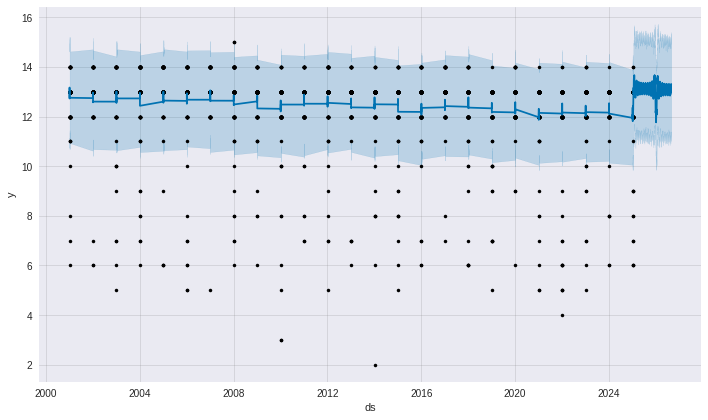

In [38]:
m.plot(forecast);


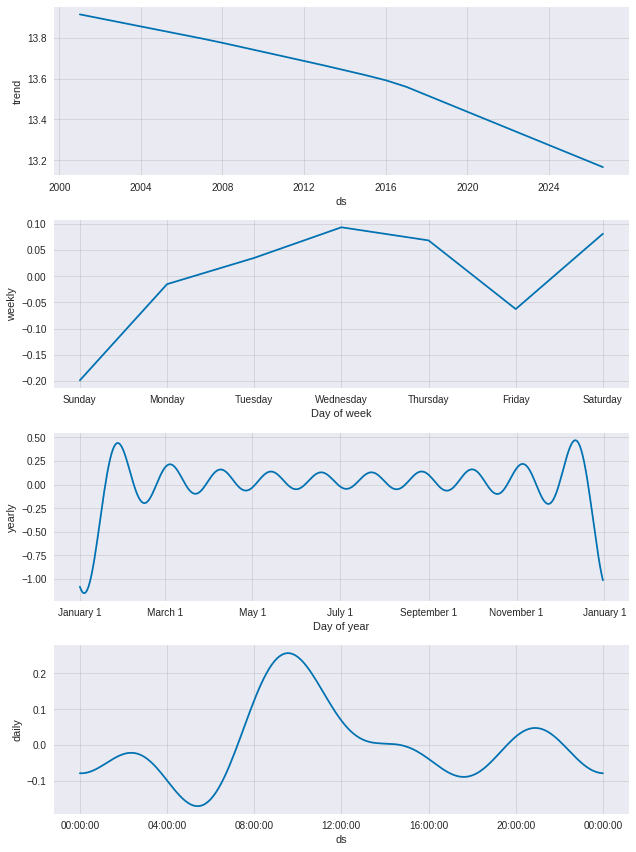

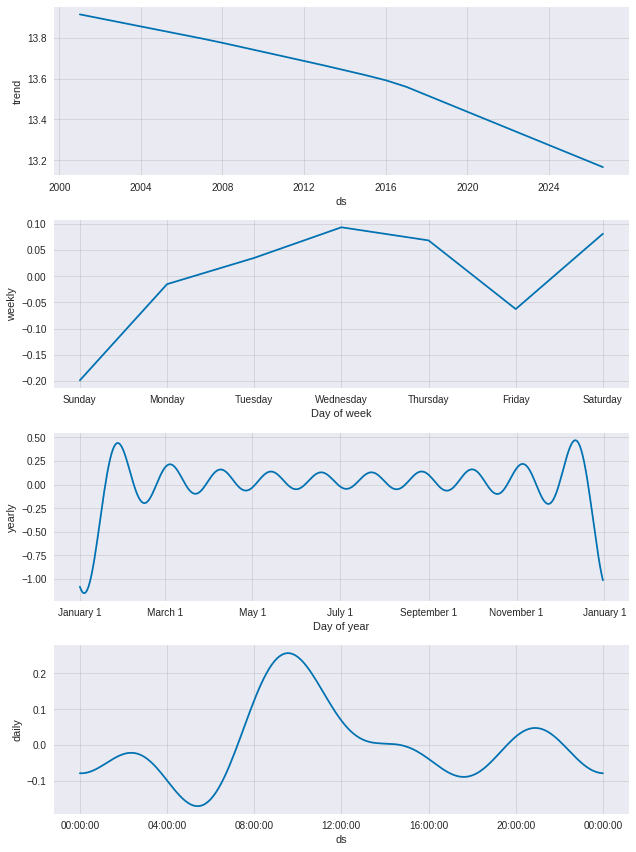

In [39]:
m.plot_components(forecast)

In [0]:
def prophet_model(train_data, prediction_days):
    m = Prophet()
    m.fit(train_data)
    future=m.make_future_dataframe(periods=prediction_days)
    forecast = m.predict(future)
    m.plot(forecast);
    m.plot_components(forecast);
    forecast = forecast[['ds','yhat']]
    return forecast

forecast = prophet_model(data , prediction_days) 

forecast = forecast.set_index('ds')

fig = plt.figure(figsize=[10,8])
ax = plt.subplot(111)
ax.plot(ts_train, label='Train')
ax.plot(ts_test, label='Valid')
ax.plot(forecast, label='Prediction')
ax.legend()
plt.show()

prophet = pd.concat([forecast, reverse_df], axis=1)
prophet.tail(40)